# Tutorial 5: QR decomposition and Linear Regression


## QR decomposition


QR decomposition is a special decomposition for an arbitrary matrix $A$, such that: $A = Q\, R$.


### QR decomposition of square matrices

For an arbitrary **square** matrix $A$, its QR decomposition has the following properties:

- $Q$ is an _Orthogonal_ matrix.
- $R$ is an Upper Triangular matrix (for this reason this decomposition is also called QU-decomposition).

Orthogonal matrices are square matrices with interesting properties:

- Their rows and columns are orthonormal vectors (i.e. they are a set of orthogonal unit vectors).
  $$
  \text{Rows:}\quad q_{i,:}^{T}\, q_{j,:} =
  \begin{cases}
      0 & \text{if} ~i\neq j\\
      1 & \text{if} ~i = j
  \end{cases}
  $$
  $$
  \text{Columns: }\quad q_{:,i}^{T}\, q_{:,j} =
  \begin{cases}
      0 & \text{if} ~i\neq j\\
      1 & \text{if} ~i = j
  \end{cases}
  $$
- Their inverse is the transpose matrix.  
   $$Q^{T}=Q^{-1} \Longrightarrow Q^{T}\, Q=I$$
- Their determinant is either +1 or -1.  
   $$\det{Q}=\pm 1$$


### QR decomposition of rectangular matrices

QR decomposition is not limited to square matrices but can also be applied to rectangular matrices.  
Given an arbitrary $m\times n$ matrix A (where $m \geq n$), its QR decomposition produces:

- An $m\times m$ Orthogonal matrix Q.
- An $m\times n$ matrix R, which is formed by an Upper Triangular matrix and a zero matrix.

The decomposition can be rewritten as:

<p style="text-align:center;">
$A = Q\, R =
\begin{bmatrix}
    Q_{1} &Q_{2}
\end{bmatrix}
\,
\begin{bmatrix}
    R_{1}\\
    0
\end{bmatrix}
= Q_{1}R_{1}
$</p>
where:

- $Q_{1}$ is a $m\times n$ matrix with orthonormal columns.
- $Q_{2}$ is a $m\times (m-n)$ matrix with orthonormal columns.
- $R_{1}$ is a $n\times n$ Upper Triangular matrix.
- $0$ is a $(m-n)\times n$ zero matrix.


## Exercise 1: QR decomposition in Julia


### Check Orthogonal matrices properties

In Julia, the QR decomposition is performed by the function `LinearAlgebra.qr`. Let's start by computing the Q and R matices for a square 3x3 matrix.

$$
A = \begin{bmatrix}
    2  & 3 & 4\\
    1  & 2 & 3\\
    -2 & 0 & 1
\end{bmatrix}
$$


In [8]:
import LinearAlgebra as linalg

A = [2.0 3.0 4.0; 1.0 2.0 3.0; -2.0 0.0 1.0]
Q, R = linalg.qr(A, linalg.NoPivot())

println("Orthogonal matrix Q:")
display(Matrix(Q))
println("Upper triangular matrix R:")
display(R)

Orthogonal matrix Q:


3×3 Matrix{Float64}:
 -0.666667  -0.503655   0.549442
 -0.333333  -0.457869  -0.824163
  0.666667  -0.73259    0.137361

Upper triangular matrix R:


3×3 Matrix{Float64}:
 -3.0  -2.66667  -3.0
  0.0  -2.4267   -4.12082
  0.0   0.0      -0.137361

Now we can verify the properties of Q defined above:

1. The rows and columns of Q are orthonormal vectors.


In [10]:
# 2-Norm of the columns
for ii = 1:size(Q,2)
    qnorm = linalg.norm(Q[:,ii])
    println("2-Norm of the $ii-th column: $qnorm")
end
println()

# 2-Norm of the rows
for ii = 1:size(Q,1)
    qnorm = linalg.norm(Q[ii,:])
    println("2-Norm of the $ii-th row: $qnorm")
end
println()

# Product of two columns
ColbyCol = (Q[:,3])'*Q[:,2]
println("Product of the third column by the second: $ColbyCol")

# Product of two rows
RowbyRow = (Q[1,:])'*Q[2,:]
println("Product of the first row by the second: $RowbyRow")

2-Norm of the 1-th column: 1.0
2-Norm of the 2-th column: 0.9999999999999999
2-Norm of the 3-th column: 0.9999999999999999

2-Norm of the 1-th row: 1.0
2-Norm of the 2-th row: 0.9999999999999999
2-Norm of the 3-th row: 1.0

Product of the third column by the second: -1.228279849871834e-16
Product of the first row by the second: 2.884625977387736e-17


2. The inverse of Q is equal to the transpose of Q.


In [12]:
display(Q'*Q - [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0])

3×3 Matrix{Float64}:
 0.0   0.0          -1.11022e-16
 0.0  -2.22045e-16  -2.22045e-16
 0.0  -1.11022e-16  -1.11022e-16

3. The determinant of Q is either +1 or -1.


In [14]:
println("The determinant of Q is: " * string(linalg.det(Q)))

The determinant of Q is: 1.0


## Rectangular matrices

Julia automatically outputs the _thin_ factorization of a rectangular matrix, which considers only $Q_{1}$ and $R_{1}$.  
We can still obtain the complete Orthogonal matrix using `collect`.


In [16]:
B = [2.0 3.0 4.0; 1.0 2.0 3.0; -2.0 0.0 1.0; 5.0 -3.0 2.0; -1.0 -2.0 -4.0]
Q, R = linalg.qr(B, linalg.NoPivot())

Q1 = Matrix(Q)
Q = collect(Q)

println("Orthogonal matrix Q:")
display(Q)
println("Matrix with orthonormal columns Q1:")
display(Q1)
println("Upper triangular matrix R:")
display(R)

Orthogonal matrix Q:


5×5 Matrix{Float64}:
 -0.338062  -0.65342     0.110687  -0.576767   0.33741
 -0.169031  -0.426143   -0.120248   0.788306   0.392358
  0.338062   0.0568191  -0.838792  -0.208047   0.36828
 -0.845154   0.454553   -0.266604  -0.0196477  0.0873622
  0.169031   0.426143    0.445689  -0.0473733  0.767429

Matrix with orthonormal columns Q1:


5×3 Matrix{Float64}:
 -0.338062  -0.65342     0.110687
 -0.169031  -0.426143   -0.120248
  0.338062   0.0568191  -0.838792
 -0.845154   0.454553   -0.266604
  0.169031   0.426143    0.445689

Upper triangular matrix R:


3×3 Matrix{Float64}:
 -5.91608   0.845154  -3.88771
  0.0      -5.02849   -4.63076
  0.0       0.0       -3.07275

$Q_{1}$ is not an Orthogonal matrix because it is not square and rows are not orthonormal.


In [18]:
# 2-Norm of the rows
for ii = 1:size(Q1,1)
    qnorm = linalg.norm(Q1[ii,:])
    println("2-Norm of the $ii-th row: $qnorm")
end
println()

# Product of two rows
RowbyRow = (Q1[5,:])'*Q1[3,:]
println("Product of the fifth row by the third: $RowbyRow")

2-Norm of the 1-th row: 0.7439721063142568
2-Norm of the 2-th row: 0.4739504289430076
2-Norm of the 3-th row: 0.9061383141261764
2-Norm of the 4-th row: 0.9959828359355493
2-Norm of the 5-th row: 0.6393809835500418

Product of the fifth row by the third: -0.2924844423168979


### Applications for Linear Systems

QR factorization can be helpful in solving linear systems.  
Let's consider a linear system $A\,x = b$ and the QR decomposition of $A$ as $Q\,R$.
We can write the following regarding the solution of the system:

<p style="text-align:center;">$A\,x=b$</p>
<p style="text-align:center;">$Q\,R\,x=b$</p>
<p style="text-align:center;">$R\,x=Q^{-1}\,b$</p>
<p style="text-align:center;">$R\,x=Q^{T}\,b$</p>

This system is much easier to solve since $R$ is an Upper Triangular matrix by definition.
The solution of this new system can be obtained by simply applying Backward Substitution.

Let's implement Backward Substitution and the Gaussian Elimination method (**without Partial Pivoting**), as you are doing in Assignment 1.


In [20]:
# Your implementation of Backward substitution and Gaussian Elimination goes here


gaussian_elimination (generic function with 1 method)

Now we can compare the solution error and residual between applying the Gaussian Elimination process or the QR decomposition.
Which will be more accurate?


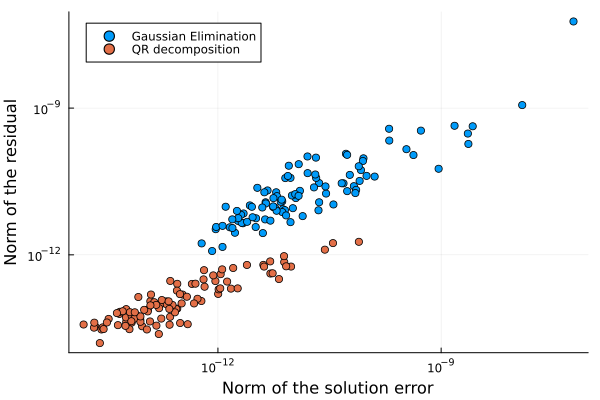

In [22]:
import Plots as plt
import Random
Random.seed!(0)
res_ge = []; res_qr = []; err_ge = []; err_qr = []

for ii = 1:100
    A = randn(100,100)
    b = randn(100)

    x_true = A \ b

    x_ge = gaussian_elimination(A, b)
    append!(res_ge, linalg.norm(A*x_ge-b))
    append!(err_ge, linalg.norm(x_ge-x_true))

    Q, R = linalg.qr(A)
    Q = Matrix(Q)
    x_qr = backward_substitution(R, Q'*b)
    append!(res_qr, linalg.norm(A*x_qr-b))
    append!(err_qr, linalg.norm(x_qr-x_true))
end

plt.scatter(err_ge,res_ge,xscale=:log10,yscale=:log10,label="Gaussian Elimination")
plt.scatter!(err_qr,res_qr,label="QR decomposition",legend=:topleft)
plt.xlabel!("Norm of the solution error")
plt.ylabel!("Norm of the residual")

_Try at home:_ Is the QR decomposition more accurate also of the Gauassian Elimination method with Partial Pivoting?
Use your functions from Assignment 1 and compare their solution error and residuals.


## Positive Definite and Semi-Definite Matrices

From lectures, a _Positive Definite_ (PD) matrix is defined as a matrix $A$ such that:
$$\text{Positive definite matrix: }\forall x \in \mathbb{R}^{n}~.~x\neq0 \rightarrow x^TAx > 0$$
Similarly, a _Positive Semi-Definite_ (PSD) matrix is defined as a matrix $A$ such that:
$$\text{Positive semi-definite matrix: }\forall x \in \mathbb{R}^{n}~.~x^TAx \geq 0$$

When given a matrix, we can determine whether it is Positive Definite or not by using _Sylvester's Criterion_.
Sylvester's Criterion states that a matrix $A$ is Positive Definite if all its leading principal minors are positive.
It is a necessary and sufficient condition for positive definiteness.  
**Note**: The leading principal minors are the determinants of the leading principal submatrices).

Given $A$, let's check whether it is positive definite or not.

$$
A = \begin{bmatrix}
     2 & -1 &  0\\
    -1 &  2 & -1\\
     0 & -1 &  2
\end{bmatrix}
$$


In [25]:
# Define matrix A
A = [2.0 -1.0 0.0; -1.0 2.0 -1.0; 0.0 -1.0 2.0]

3×3 Matrix{Float64}:
  2.0  -1.0   0.0
 -1.0   2.0  -1.0
  0.0  -1.0   2.0

The leading principal submatrix of order 1 is the scalar value $2$.  
The leading principal submatrix of order 2 is $\begin{bmatrix}2 & -1\\-1 & 2\end{bmatrix}$.  
The leading principal submatrix of order 3 is matrix $A$ itself.

We can find the leading principal minors below.


In [27]:
# Leading Principal Submatrix of Order 1
lps_1 = A[1, 1]

# Leading Principal Submatrix of Order 2
lps_2 = A[1:2, 1:2]

# Leading Principal Submatrix of Order 2
lps_3 = A

# Leading Principal Minors 
lpm_1 = linalg.det(lps_1)
lpm_2 = linalg.det(lps_2)
lpm_3 = linalg.det(lps_3)

println("Leading Principal Minor of Order 1 = ", lpm_1)
println("Leading Principal Minor of Order 2 = ", lpm_2)
println("Leading Principal Minor of Order 3 = ", lpm_3)

Leading Principal Minor of Order 1 = 2.0
Leading Principal Minor of Order 2 = 3.0
Leading Principal Minor of Order 3 = 4.0


All of the Leading Principal Minors are positive. Therefore, matrix $A$ is positive definite.  
For each eigenvalue $\lambda_i$ of a symmetric positive definite matrix, $\lambda_i > 0$ and $\lambda_i \in \mathbb{R}$.
Similarly, for a symmetric positive semi-definite matrix $\lambda_i \geq 0$ and $\lambda_i \in \mathbb{R}$.


In [29]:
eigvalues = linalg.eigvals(A)

3-element Vector{Float64}:
 0.585786437626905
 1.9999999999999998
 3.414213562373095

Indeed, the eigenvalues of the positive definite matrix are all real and positive.
Naturally, this also means that $\det(A) > 0$, since $\det(A) = \displaystyle \prod_{i=1}^{n} \lambda_i$


In [31]:
println("The determinant of A is: $(linalg.det(A))")

The determinant of A is: 4.0


## Exercise 2: Positive Semi-Definitess of Sample Covariance

Another application of positive (semi)-definiteness in engineering is that when sampling from a given distribution, the covariance matrix of this sample will always be symmetric and positive semi-definite.

$$\text{cov}(x,y)=\frac{1}{N-1}\sum_{i=0}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y})$$


In [33]:
Random.seed!(123)

# This function computes the covariance of two arrays x and y of equal length.
function cov(x, y)
    
    if length(x) != length(y)
        throw(ArgumentError("Arrays x and y must have the same length"))
    end

    n = length(x)
    mean_x = sum(x)/n
    mean_y = sum(y)/n

    cov = 0.0
    for ii = 1:n
        cov += (x[ii] - mean_x) * (y[ii] - mean_y)
    end
    cov = cov/(n-1)
    return cov
end

# 1000 samples of 3 variables from a normal distribution
data = randn(1000, 3) 

# Finding the covariance matrix of the sampled data.
cov_matrix = zeros(size(data,2),size(data,2))
for ii = 1:size(cov_matrix,1)
    for jj = 1:size(cov_matrix,2)
        cov_matrix[ii,jj] = cov(data[:,ii],data[:,jj])
    end
end
display(cov_matrix)

3×3 Matrix{Float64}:
  0.972669   -0.0228613  0.0152865
 -0.0228613   1.00925    0.0123236
  0.0152865   0.0123236  0.954454

Note that the covariance matrix of our sample data is symmetric.
We can use Sylvester's Criterion to see if it is positive definite.


In [35]:
#Leading Principal Submatrix of Order 1
lps_1 = cov_matrix[1, 1]

#Leading Principal Submatrix of Order 2
lps_2 = cov_matrix[1:2, 1:2]

#Leading Principal Minors 
cov_lpm_1 = linalg.det(lps_1)
cov_lpm_2 = linalg.det(lps_2)
cov_lpm_3 = linalg.det(cov_matrix);

println("Leading Principal Minor of Order 1 = ", cov_lpm_1)
println("Leading Principal Minor of Order 2 = ", cov_lpm_2)
println("Leading Principal Minor of Order 3 = ", cov_lpm_3)

Leading Principal Minor of Order 1 = 0.9726689810192681
Leading Principal Minor of Order 2 = 0.9811404144593698
Leading Principal Minor of Order 3 = 0.9360612329313679


The sample covariance of our data is positive definite.
If one or all of the leading principal minors were 0, then our covariance matrix would be positive semi-definite.


## Exercise 3: Linear Regression

Linear Regression is particularly useful to extrapolate linear relationships from experimental data affected by noise.  
Even if the phenomenon under analysis is extremely linear, the noise and disturbances present when measuring will prevent us from identifying a linear equation using interpolation.
In this cases, it's better to use Regression techniques, such as Least-Square Regression.

Let's generate 50 data points (with random gaussian noise) that show a linear trend. We can approximate the real linear function using Least-Square Regression:


In [38]:
# Define accurate function
n = 50;
f(x) = @. 1.43*x-2.36;

# Choose values of x for which the function is measured
x = 1:0.001:5;
X = Random.rand(x,n);

# Generate measurement affected by noise
Y = f(X) + Random.randn(n)*0.2;

In [39]:
A = [X'*X sum(X); sum(X) n];
b = [X'*Y; sum(Y)];
Coeff = A \ b;

display(Coeff)

2-element Vector{Float64}:
  1.433096340168835
 -2.407191216957731

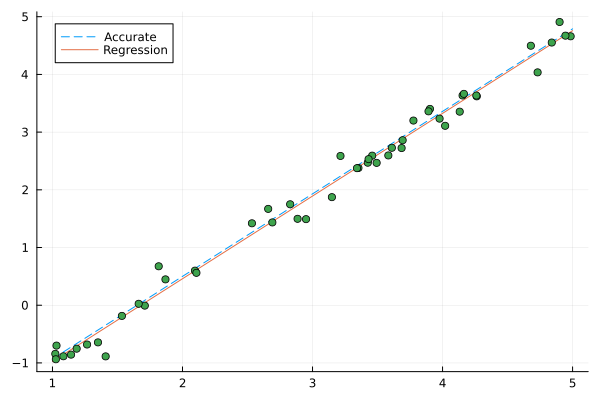

In [40]:
p(x) = @. Coeff[1]*x+Coeff[2];

plt.plot(x,f(x),linestyle=:dash,label="Accurate")
plt.plot!(x,p(x),label="Regression")
plt.scatter!(X,Y,label=false)